In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


# **Download Data set **

# `https://public.roboflow.com/object-detection/thermal-dogs-and-people`

In [3]:
'''
from roboflow import Roboflow
rf = Roboflow(api_key="Ua76tHn3kTHb1oMUJKmd")
project = rf.workspace("joseph-nelson").project("thermal-dogs-and-people")
version = project.version(1)
dataset = version.download("yolov8")

'''

'\nfrom roboflow import Roboflow\nrf = Roboflow(api_key="Ua76tHn3kTHb1oMUJKmd")\nproject = rf.workspace("joseph-nelson").project("thermal-dogs-and-people")\nversion = project.version(1)\ndataset = version.download("yolov8")\n\n'

In [4]:
# !scp -r /content/Thermal-Dogs-and-People-1 '/content/drive/MyDrive/Colab Notebooks/Thermal Dogs and People Detection using YOLO'

In [5]:
ROOT_DIR = '/content/drive/MyDrive/Colab Notebooks/Thermal Dogs and People Detection using YOLO'

# **Write YAML Inline**

In [6]:
'''
names:
- dog
- person
nc: 2
roboflow:
  license: Public Domain
  project: thermal-dogs-and-people
  url: https://universe.roboflow.com/joseph-nelson/thermal-dogs-and-people/dataset/1
  version: 1
  workspace: joseph-nelson
test: ../test/images
train: ../train/images
val: ../valid/images

'''

'\nnames:\n- dog\n- person\nnc: 2\nroboflow:\n  license: Public Domain\n  project: thermal-dogs-and-people\n  url: https://universe.roboflow.com/joseph-nelson/thermal-dogs-and-people/dataset/1\n  version: 1\n  workspace: joseph-nelson\ntest: ../test/images\ntrain: ../train/images\nval: ../valid/images\n\n'

In [7]:
!pip install pyyaml

In [8]:
import yaml
import os

# Create a dictionary for YAML content

data = {
    'path': os.path.join( ROOT_DIR, 'Thermal-Dogs-and-People'),
    'train': "/content/drive/MyDrive/Colab Notebooks/Thermal Dogs and People Detection using YOLO/Thermal-Dogs-and-People/train",
    'val':    '/content/drive/MyDrive/Colab Notebooks/Thermal Dogs and People Detection using YOLO/Thermal-Dogs-and-People/valid',
    'names': {0: 'dog', 1: 'person'}
}
with open("data.yaml", "w") as file:
    yaml.dump(data, file)

print("YAML file created successfully!")

YAML file created successfully!


In [9]:
# Load and read the YAML file
with open("data.yaml", "r") as file:
    loaded_data = yaml.safe_load(file)

print("Loaded YAML Content:")
print(loaded_data)


Loaded YAML Content:
{'names': {0: 'dog', 1: 'person'}, 'path': '/content/drive/MyDrive/Colab Notebooks/Thermal Dogs and People Detection using YOLO/Thermal-Dogs-and-People', 'train': '/content/drive/MyDrive/Colab Notebooks/Thermal Dogs and People Detection using YOLO/Thermal-Dogs-and-People/train', 'val': '/content/drive/MyDrive/Colab Notebooks/Thermal Dogs and People Detection using YOLO/Thermal-Dogs-and-People/valid'}


In [10]:
! pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.3/901.3 kB 35.2 MB/s eta 0:00:00


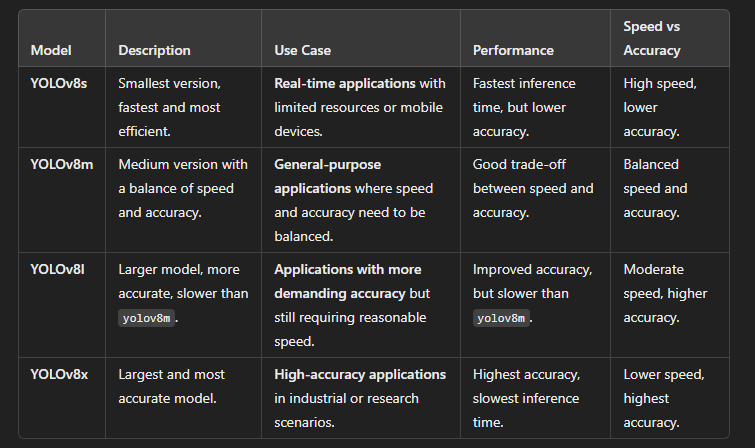

In [24]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8x.yaml")  # build a new model from scratch

# Use the model
results = model.train(data = '/content/drive/MyDrive/Colab Notebooks/Thermal Dogs and People Detection using YOLO/Thermal-Dogs-and-People/data.yaml', epochs=150)  # train the model

Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=/content/drive/MyDrive/Colab Notebooks/Thermal Dogs and People Detection using YOLO/Thermal-Dogs-and-People/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False,

train: Scanning /content/drive/MyDrive/Colab Notebooks/Thermal Dogs and People Detection using YOLO/Thermal-Dogs-and-People/train/labels.cache... 142 images, 11 backgrounds, 0 corrupt: 100%|██████████| 142/142 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Colab Notebooks/Thermal Dogs and People Detection using YOLO/Thermal-Dogs-and-People/valid/labels.cache... 41 images, 5 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      13.4G       3.43      4.274      4.336         28        640: 100%|██████████| 9/9 [00:11<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         41         49    0.00191      0.355    0.00347     0.0019



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      13.2G      3.547      4.954      4.228         36        640: 100%|██████████| 9/9 [00:11<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         41         49    0.00114      0.378    0.00216    0.00106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      13.6G      3.395      4.013      4.085         37        640: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         41         49     0.0013      0.446    0.00236    0.00104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      13.2G      3.288      3.883      3.942         38        640: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         41         49     0.0018      0.378    0.00256    0.00115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      13.7G      3.129      3.671      3.758         39        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         41         49   0.000909      0.037   0.000528   0.000175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      13.2G      2.991      3.656      3.631         24        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         41         49    0.00224     0.0825    0.00141   0.000477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      13.2G      2.843      3.592      3.531         42        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         41         49       0.09      0.227     0.0605     0.0117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      13.2G       2.89       3.36       3.43         32        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         41         49   0.000784      0.138   0.000691    0.00038



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      13.2G      2.724       3.37      3.377         25        640: 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         41         49    0.00161       0.33    0.00116   0.000419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      13.2G       2.73      3.344      3.273         26        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all         41         49    0.00186      0.359    0.00144   0.000423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      13.4G      2.629      3.269      3.227         35        640: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all         41         49    0.00186      0.359    0.00144   0.000423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      13.4G      2.651      3.152      3.184         36        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all         41         49   0.000465      0.185   0.000328   0.000153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      13.2G      2.678      3.176      3.134         39        640: 100%|██████████| 9/9 [00:11<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         41         49        0.5      0.148    0.00104   0.000355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      13.8G      2.612      3.034      3.105         45        640: 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all         41         49   0.000298       0.13    0.00019      6e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      13.4G      2.555      3.021      3.028         36        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         41         49   0.000137     0.0556   7.82e-05   4.26e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      13.4G      2.497      2.837      3.007         29        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         41         49      0.014      0.427      0.014    0.00398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      13.2G       2.57      3.063      3.077         31        640: 100%|██████████| 9/9 [00:11<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         41         49     0.0122      0.256    0.00548    0.00113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      13.7G      2.504      2.999      2.944         31        640: 100%|██████████| 9/9 [00:10<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         41         49     0.0206      0.138     0.0089    0.00238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      13.4G      2.482      2.947      3.028         33        640: 100%|██████████| 9/9 [00:11<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         41         49      0.106      0.235     0.0435     0.0174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      13.4G        2.4      2.748      2.863         37        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         41         49     0.0691      0.184     0.0432     0.0152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      13.2G        2.4      2.748      2.933         41        640: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         41         49      0.134     0.0556     0.0346     0.0125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      13.7G      2.435       2.81      2.885         33        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all         41         49      0.055      0.037    0.00836    0.00324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      13.4G      2.334       2.74      2.846         30        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         41         49      0.049        0.2     0.0229     0.0058



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      13.4G      2.345       2.62      2.822         33        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         41         49      0.591      0.167     0.0557     0.0176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      13.2G      2.271      2.659      2.693         37        640: 100%|██████████| 9/9 [00:11<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         41         49      0.583      0.148     0.0777     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      13.7G      2.346      2.699       2.75         46        640: 100%|██████████| 9/9 [00:11<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         41         49       0.23      0.111      0.109     0.0388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      13.4G      2.191      2.705      2.754         38        640: 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         41         49     0.0175      0.134     0.0104    0.00344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      13.4G      2.252      2.745      2.762         31        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         41         49      0.421      0.272      0.253      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      13.2G      2.229      2.596      2.695         39        640: 100%|██████████| 9/9 [00:11<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         41         49      0.279      0.412      0.286      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      13.7G      2.269      2.677      2.674         28        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all         41         49      0.373      0.235      0.245     0.0915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      13.4G      2.159       2.58      2.633         41        640: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         41         49      0.257      0.421      0.288       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      13.4G       2.15      2.577      2.642         37        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         41         49       0.19      0.337      0.194     0.0808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      13.2G      2.205      2.534      2.588         34        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         41         49      0.264        0.4      0.254      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      13.7G      2.152      2.475      2.622         44        640: 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         41         49      0.294      0.408      0.262      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      13.4G      2.243      2.519      2.692         47        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         41         49      0.408      0.343      0.266      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      13.4G       2.24        2.6      2.657         32        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         41         49      0.192      0.451      0.171     0.0666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      13.2G      2.164      2.466      2.564         30        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         41         49      0.226      0.326      0.157     0.0622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      13.7G      2.114      2.489      2.541         34        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all         41         49      0.214      0.371      0.147     0.0542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      13.4G      2.083      2.477      2.538         36        640: 100%|██████████| 9/9 [00:11<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         41         49      0.098      0.423     0.0804     0.0235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      13.4G      2.095      2.432      2.531         28        640: 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         41         49      0.199      0.495      0.247     0.0951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      13.2G      2.114      2.397      2.554         39        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         41         49       0.27      0.359      0.239      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      13.7G      2.081      2.294      2.517         43        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         41         49      0.276      0.445      0.254      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      13.4G      2.011      2.253      2.409         35        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         41         49      0.304       0.38      0.203     0.0863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      13.4G      2.111      2.445      2.586         38        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         41         49      0.431      0.317      0.315      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      13.2G      2.037      2.356      2.519         33        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         41         49      0.292      0.452      0.297       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      13.7G      2.022      2.303      2.497         26        640: 100%|██████████| 9/9 [00:11<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all         41         49      0.322      0.451      0.322      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      13.4G      2.037      2.282      2.481         42        640: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         41         49      0.232      0.414      0.276       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      13.4G      1.926      2.181      2.402         33        640: 100%|██████████| 9/9 [00:11<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         41         49      0.262      0.435       0.21     0.0938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      13.2G      2.002      2.205      2.418         30        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         41         49       0.31      0.429      0.299      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      13.7G      1.949      2.236      2.407         34        640: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         41         49      0.293      0.472      0.366      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      13.4G      2.042      2.217      2.443         35        640: 100%|██████████| 9/9 [00:10<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         41         49      0.423      0.398      0.356      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      13.4G      1.928      2.077       2.36         36        640: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         41         49      0.343      0.522      0.337      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      13.2G      1.924      2.184      2.404         33        640: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         41         49      0.431      0.297      0.262      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      13.7G      1.859      2.145      2.327         24        640: 100%|██████████| 9/9 [00:11<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all         41         49      0.415      0.367      0.341       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      13.4G      1.818      2.085       2.26         36        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         41         49      0.365      0.454      0.386      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      13.4G      1.866      2.102      2.321         28        640: 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         41         49      0.422      0.468      0.431       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      13.2G      1.765      2.024      2.283         36        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         41         49       0.62      0.367      0.485      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      13.7G      1.843      2.203      2.351         28        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         41         49      0.629      0.511      0.559      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      13.4G      1.865      2.121      2.286         29        640: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         41         49      0.443      0.475       0.46      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      13.4G      1.844      2.056      2.341         25        640: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         41         49      0.657      0.431       0.57      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      13.2G      1.837      2.021      2.279         29        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         41         49      0.444      0.472       0.47      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      13.7G      1.808      1.982      2.292         26        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         41         49      0.533      0.386      0.503      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      13.4G      1.779      1.958      2.246         39        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         41         49      0.498      0.466      0.475      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      13.4G      1.772      1.924      2.241         37        640: 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         41         49      0.551      0.532      0.575      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      13.2G       1.72      1.891      2.244         43        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         41         49      0.454      0.557      0.517      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      13.7G      1.673      1.831      2.184         42        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         41         49      0.477      0.481      0.524      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      13.4G        1.7      1.829       2.14         38        640: 100%|██████████| 9/9 [00:11<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         41         49      0.743       0.37      0.514      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      13.4G      1.721      1.984      2.166         33        640: 100%|██████████| 9/9 [00:11<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         41         49      0.439      0.592      0.546      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      13.2G       1.74      1.933      2.182         34        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         41         49      0.536      0.566      0.561      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      13.7G      1.798      2.008       2.24         40        640: 100%|██████████| 9/9 [00:10<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all         41         49      0.516      0.592      0.535      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      13.4G      1.646      1.826      2.134         32        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         41         49      0.554      0.391      0.566      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      13.4G      1.681      1.868      2.127         32        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         41         49      0.668      0.633      0.676       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      13.2G      1.643      1.779      2.093         35        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         41         49      0.535      0.662      0.631      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      13.7G      1.723      1.901       2.17         35        640: 100%|██████████| 9/9 [00:11<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         41         49      0.552      0.558      0.647      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      13.4G      1.677      1.817      2.157         29        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         41         49      0.599      0.518      0.535      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      13.4G      1.546      1.741      2.075         25        640: 100%|██████████| 9/9 [00:11<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         41         49      0.566      0.693      0.661      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      13.2G       1.55      1.756      2.019         28        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         41         49      0.725      0.567      0.634      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      13.7G      1.597      1.764       2.08         43        640: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all         41         49      0.505       0.53      0.544      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      13.4G       1.58      1.759      2.095         32        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         41         49      0.498      0.519      0.524      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      13.4G      1.517      1.685      2.003         42        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         41         49      0.572      0.668      0.659      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      13.2G      1.544      1.713      1.993         31        640: 100%|██████████| 9/9 [00:11<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         41         49      0.464      0.663       0.61      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      13.7G      1.632      1.832      2.087         31        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         41         49       0.59      0.604      0.624      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      13.4G      1.564      1.709      1.998         37        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         41         49      0.625      0.599      0.675      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      13.4G      1.515      1.677      2.056         44        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         41         49      0.719      0.633       0.72      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      13.2G       1.58       1.71      2.023         43        640: 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         41         49      0.858      0.546      0.701      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      13.7G      1.474      1.556      1.975         35        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         41         49       0.67       0.56      0.674      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      13.4G      1.604      1.673      2.019         28        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         41         49      0.748       0.61      0.707      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      13.4G      1.488      1.652      1.962         35        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         41         49      0.697      0.578      0.692      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      13.2G      1.522       1.71      1.996         35        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         41         49      0.619      0.557      0.643      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      13.7G      1.508      1.632      1.973         40        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all         41         49      0.567      0.587      0.715       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      13.4G      1.506      1.651      2.012         26        640: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         41         49      0.889      0.594       0.75      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      13.4G      1.464      1.675      1.983         42        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         41         49      0.635        0.6      0.653      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      13.2G      1.431      1.587      1.912         35        640: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         41         49      0.503      0.715      0.705      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      13.7G      1.404      1.555      1.922         46        640: 100%|██████████| 9/9 [00:11<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         41         49      0.707      0.698      0.763      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      13.4G      1.421      1.594      1.879         30        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         41         49      0.709      0.636      0.742      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      13.4G      1.408      1.465       1.87         30        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         41         49      0.655       0.61       0.71      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      13.2G      1.404      1.539      1.925         35        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         41         49      0.684      0.635      0.725       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      13.7G      1.424      1.538      1.929         28        640: 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         41         49      0.787      0.551      0.719      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      13.4G      1.411      1.525      1.876         40        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         41         49      0.624      0.654      0.713       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      13.4G      1.436      1.568      1.879         32        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         41         49      0.574      0.629      0.655      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      13.2G      1.399      1.625      1.906         35        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         41         49      0.712       0.63      0.691      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      13.7G      1.363      1.529       1.85         33        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         41         49      0.838      0.604       0.75      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      13.4G      1.376      1.584      1.896         33        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         41         49      0.693      0.697      0.757      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      13.4G      1.355      1.414      1.787         35        640: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         41         49      0.771      0.753      0.811      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      13.2G      1.407      1.525      1.869         29        640: 100%|██████████| 9/9 [00:11<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         41         49      0.707      0.681      0.796      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      13.7G      1.314      1.474      1.817         24        640: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all         41         49      0.916      0.585      0.806      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      13.4G      1.307      1.489      1.843         33        640: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         41         49       0.77      0.742      0.815      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      13.4G      1.383      1.487      1.862         31        640: 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         41         49      0.669      0.635      0.778      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      13.2G      1.321      1.421       1.78         32        640: 100%|██████████| 9/9 [00:11<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         41         49      0.613      0.762      0.768      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      13.7G      1.339      1.461      1.822         34        640: 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         41         49       0.83      0.647      0.826      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      13.4G      1.311      1.449      1.775         35        640: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         41         49      0.768      0.668      0.798       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      13.4G      1.272       1.52      1.811         29        640: 100%|██████████| 9/9 [00:11<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         41         49      0.875      0.633      0.785      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      13.2G      1.387      1.495      1.875         42        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         41         49      0.773      0.657      0.771      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      13.7G      1.319      1.426      1.757         40        640: 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         41         49      0.694      0.748      0.772      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      13.4G      1.264      1.436       1.76         34        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         41         49      0.685      0.678      0.783      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      13.4G      1.279      1.424      1.771         40        640: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         41         49      0.706      0.768      0.813      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      13.2G      1.272       1.36      1.736         44        640: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         41         49      0.689      0.734       0.83      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      13.7G      1.258      1.373      1.813         36        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         41         49      0.833      0.668      0.808      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      13.4G      1.256      1.403      1.746         30        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         41         49      0.895      0.592       0.82      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      13.4G      1.168      1.239      1.679         31        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         41         49      0.645      0.779      0.817      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      13.1G      1.275      1.436      1.752         35        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         41         49      0.785      0.641        0.8      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      13.7G      1.229      1.372      1.746         27        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all         41         49      0.682      0.793      0.808       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      13.4G      1.264      1.359      1.741         38        640: 100%|██████████| 9/9 [00:11<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         41         49      0.666      0.748      0.797      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      13.4G      1.218      1.323       1.71         25        640: 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         41         49      0.812      0.637      0.828       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      13.2G      1.223      1.373      1.741         25        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         41         49      0.686      0.785       0.82      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      13.8G      1.257      1.311      1.734         42        640: 100%|██████████| 9/9 [00:11<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         41         49      0.775      0.726      0.832      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      13.4G      1.197      1.362      1.746         33        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         41         49      0.903      0.679      0.853      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      13.4G      1.122      1.272      1.659         38        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         41         49      0.904      0.706      0.876      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      13.2G      1.226      1.285      1.712         45        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         41         49      0.885        0.7      0.874      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      13.7G      1.213      1.289       1.75         30        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         41         49      0.923      0.764       0.87      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      13.4G      1.166      1.299      1.694         29        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         41         49      0.838      0.715      0.864      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      13.4G      1.207      1.317      1.705         27        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         41         49      0.847      0.674      0.833      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      13.2G      1.184      1.334      1.676         37        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         41         49      0.853      0.726      0.846      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      13.7G      1.216      1.315      1.737         32        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         41         49      0.708      0.809       0.85      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      13.4G      1.196       1.28      1.731         37        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         41         49       0.76      0.793      0.863      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      13.4G      1.092      1.218      1.615         29        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         41         49       0.89      0.702      0.869      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      13.2G      1.198      1.255       1.71         31        640: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         41         49      0.888      0.648      0.852      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      13.7G      1.167      1.282      1.718         51        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         41         49      0.713      0.853      0.861      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      13.4G      1.144      1.201      1.651         31        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         41         49      0.759      0.835      0.865      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      13.4G      1.158      1.162      1.652         36        640: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         41         49      0.894      0.661      0.862      0.649


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      13.2G      1.005      1.146      1.621         16        640: 100%|██████████| 9/9 [00:12<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         41         49        0.9      0.697       0.87      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      13.7G     0.9718      1.038      1.572         23        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         41         49      0.755      0.858      0.879      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      13.4G     0.9614     0.9773      1.574         19        640: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         41         49      0.782      0.838      0.869      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      13.4G     0.9483     0.9515        1.5         20        640: 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         41         49      0.758       0.88      0.887      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      13.2G     0.9541      0.966      1.547         20        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         41         49      0.781      0.888      0.897      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      13.7G     0.9394     0.9168      1.601         19        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         41         49      0.765       0.91      0.906       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      13.4G     0.9079     0.9119      1.514         20        640: 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         41         49      0.862      0.785      0.906      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      13.4G     0.9322     0.9213      1.509         23        640: 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         41         49      0.868      0.801      0.907      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      13.2G     0.9051      0.879       1.56         18        640: 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         41         49      0.877      0.798      0.906      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      13.8G     0.8756     0.9064      1.483         16        640: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all         41         49      0.872      0.812      0.908      0.707



150 epochs completed in 0.959 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 136.7MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x summary (fused): 268 layers, 68,125,494 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]


                   all         41         49      0.877      0.798      0.906      0.718
                   dog         22         22      0.874      0.773      0.904      0.759
                person         19         27      0.881      0.824      0.909      0.678
Speed: 0.2ms preprocess, 28.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train6


In [26]:
# Assuming 'results.maps' contains the mAP values
train_map50 = results.maps[0]  # mAP@0.5 for training
val_map50 = results.maps[1]    # mAP@0.75 for validation

# Convert mAP values to percentage
train_accuracy = train_map50 * 100  # Convert to percentage
val_accuracy = val_map50 * 100      # Convert to percentage

# Print the accuracy as percentages
print(f"Training Accuracy (mAP@0.5): {train_accuracy:.2f}%")
print(f"Validation Accuracy (mAP@0.75): {val_accuracy:.2f}%")


Training Accuracy (mAP@0.5): 75.92%
Validation Accuracy (mAP@0.75): 67.78%


In [33]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!cp -r /content/runs '/content/drive/MyDrive/Colab Notebooks/Thermal Dogs and People Detection using YOLO'


image 1/1 /content/drive/MyDrive/Colab Notebooks/Thermal Dogs and People Detection using YOLO/Thermal-Dogs-and-People/test/images/IMG_0060_jpg.rf.f2ca14907be0dffbc84fe1ee02c92731.jpg: 640x640 1 dog, 1 person, 96.6ms
Speed: 4.1ms preprocess, 96.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train66


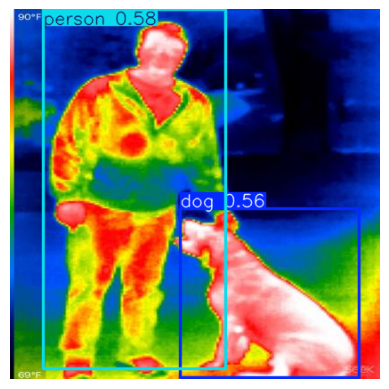

In [41]:
import matplotlib.pyplot as plt
import cv2

prediction = model.predict("/content/drive/MyDrive/Colab Notebooks/Thermal Dogs and People Detection using YOLO/Thermal-Dogs-and-People/test/images/IMG_0060_jpg.rf.f2ca14907be0dffbc84fe1ee02c92731.jpg", save=True)

# Display the image with bounding boxes
for r in prediction:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)
    plt.imshow(im)
    plt.axis("off")
    plt.show()